# 02 - Display Well Logs

This the 2nd notebook in the series Lithology Prediction With Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Loading the Data

In [2]:
data = pd.read_csv("../data/train.csv", sep=';')

In [3]:
wells = list(data['WELL'].unique())
well_data=data[data['WELL']==wells[0]] # change the index to change the well
well_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,8.585064,...,1.524012,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0
18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,8.142556,...,2.056166,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0
18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,7.933336,...,2.909438,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0
18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,7.837981,...,2.909438,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0


In [4]:
well_data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [5]:
use_col= ['WELL', 'DEPTH_MD', 'Z_LOC', 'CALI', 'GR','RSHA', 'RMED', 'RDEP',  'RHOB',  'NPHI']
well_data=well_data[use_col]
well_data

,WELL,DEPTH_MD,Z_LOC,CALI,GR,RSHA,RMED,RDEP,RHOB,NPHI
0,15/9-13,494.528,-469.501831,19.480835,80.200851,NaN,1.611410,1.798681,1.884186,NaN
1,15/9-13,494.680,-469.653809,19.468800,79.262886,NaN,1.618070,1.795641,1.889794,NaN
2,15/9-13,494.832,-469.805786,19.468800,74.821999,NaN,1.626459,1.800733,1.896523,NaN
3,15/9-13,494.984,-469.957794,19.459282,72.878922,NaN,1.621594,1.801517,1.891913,NaN
4,15/9-13,495.136,-470.109772,19.453100,71.729141,NaN,1.602679,1.795299,1.880034,NaN
...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,-3245.549316,8.541623,19.418915,NaN,8.585064,8.065685,2.630211,0.187811
18266,15/9-13,3271.568,-3245.700928,8.557213,21.444370,NaN,8.142556,8.205255,2.643114,0.185574
18267,15/9-13,3271.720,-3245.852539,8.577917,22.646879,NaN,7.933336,8.249817,2.681300,0.176074
18268,15/9-13,3271.872,-3246.004395,8.478219,22.253584,NaN,7.837981,8.303959,2.738337,0.174617


# Visualising Logs

If you are familar with the Petrophysical workflow you'll know that the logs are ploted on different tracks. Now Let's see how we go about that

## Gamma ray Log (GR)

Let's figure how we display the GR log

<Axes: xlabel='GR'>

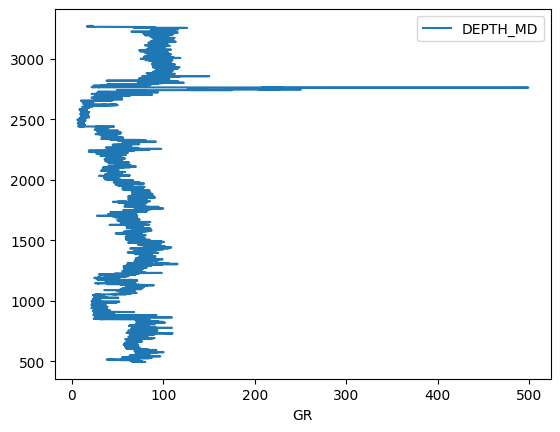

In [7]:
# We can start by plotting the GR with Depth in MD
well_data.plot('GR', 'DEPTH_MD')

We have our GR plot but the depth should be from shallow to deep not the other round. we can correct that by using ylim

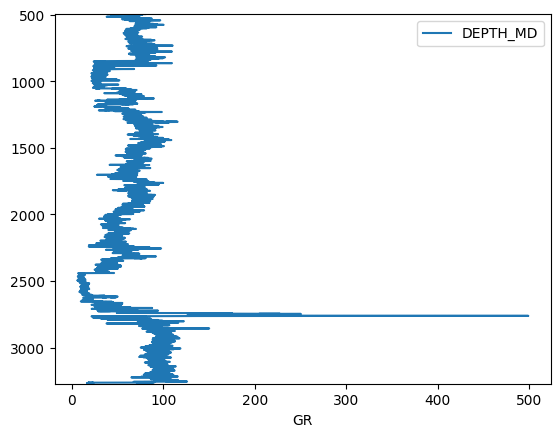

In [8]:
well_data.plot('GR', 'DEPTH_MD')
plt.ylim(max(well_data['DEPTH_MD']), min(well_data['DEPTH_MD']));

<Axes: xlabel='GR'>

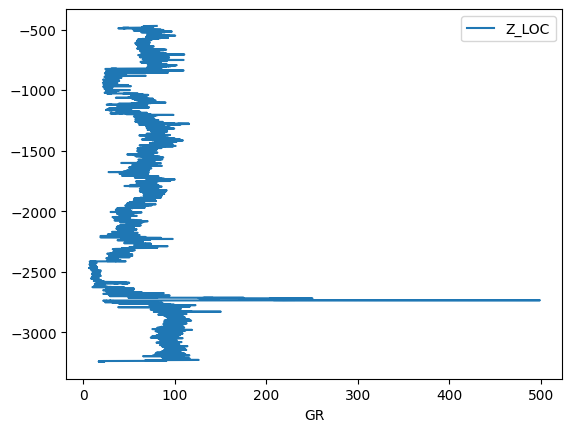

In [9]:
# we have the 'Z_LOC' column that shows negative depth (We are not told if this is TVD or TVDSS)
well_data.plot('GR', 'Z_LOC')

<Axes: xlabel='GR'>

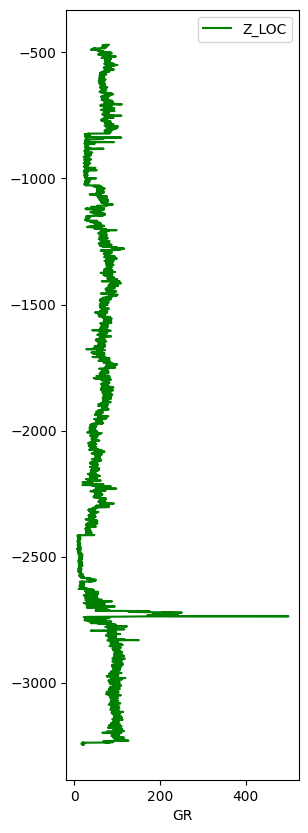

In [10]:
# We can now customise the GR log based on how it needs to look
well_data.plot('GR', 'Z_LOC', color='green', figsize=(3, 10))

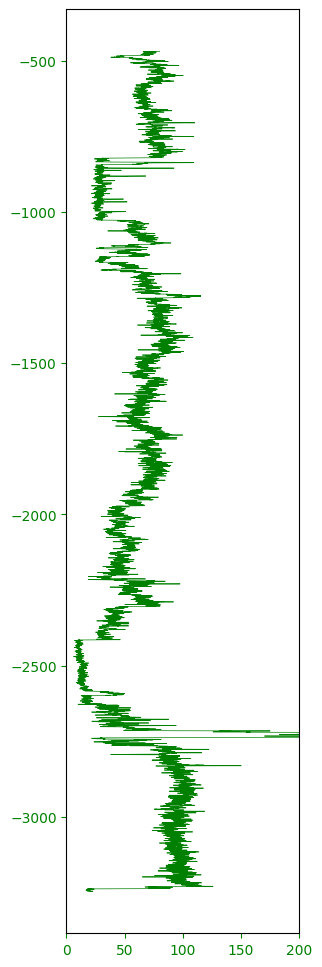

In [12]:
# Change the limit of GR

plt.figure(figsize=(3,12))
plt.plot('GR', 'Z_LOC', data=well_data, color='green', linewidth=0.5)
plt.xlim(0, 200)
plt.tick_params(colors='green')

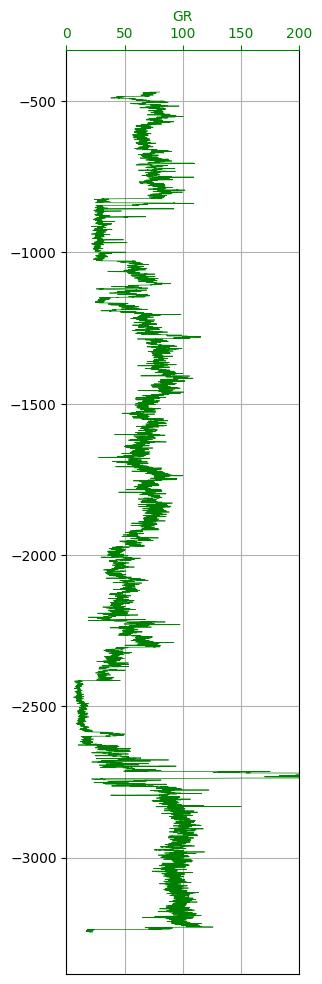

In [16]:
# Move the x axis Ticks & Labels  to the top and customise. You can comment different lines and notice the changes
fig, ax= plt.subplots(1, 1, figsize=(3,12))


plt.plot('GR', 'Z_LOC', data=well_data, color='green', linewidth=0.5)
plt.xlim(0, 200)
plt.tick_params(axis='x', colors='green') # change the tick color
ax.grid() # Show grid
ax.set_xlabel('GR')
ax.xaxis.set_label_position('top') #change label position to top
ax.xaxis.label.set_color("green") # change label colour
ax.xaxis.tick_top()
ax.spines["top"].set_edgecolor("green")

# Resistivity

Now our GR track looks good let's create resistivity track and attempt plotting plots in one track

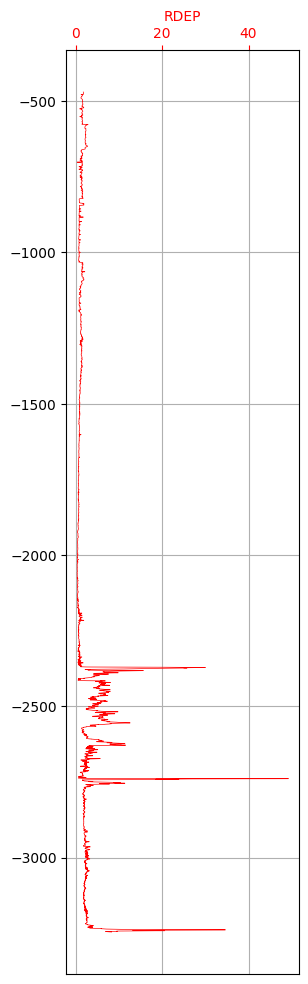

In [20]:
# repeat thesame steps we did for GR track here but using RDEP, comment out the xlim
fig, ax= plt.subplots(1, 1, figsize=(3,12))
plt.plot(well_data['RDEP'], well_data['Z_LOC'], color='red', linewidth=0.5)
# plt.xlim(0, 200)
plt.tick_params(axis='x', colors='red')
ax.grid()
ax.set_xlabel('RDEP')
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.xaxis.label.set_color("red")



(0.2, 2000)

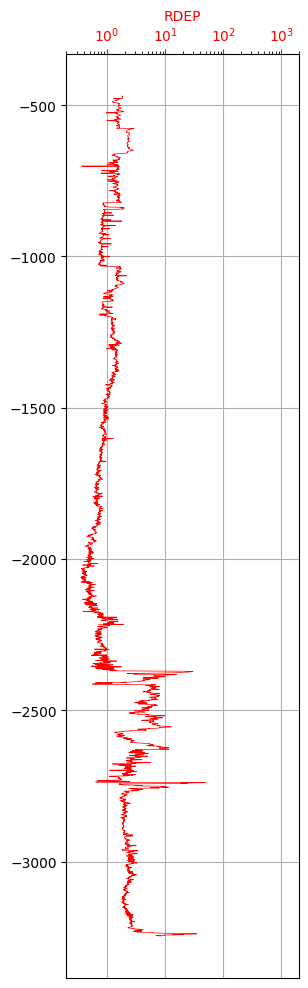

In [21]:
# resistivity logs are usuall visualised in log scale so we can change the scale of x axis
fig, ax= plt.subplots(1, 1, figsize=(3,12))
plt.plot(well_data['RDEP'], well_data['Z_LOC'], color='red', linewidth=0.5)

ax.set_xscale("log")
plt.xlim(0.2, 2000)

plt.tick_params(axis='x', colors='red')
ax.grid()
ax.set_xlabel('RDEP')
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.xaxis.label.set_color("red")



## Multiple Resistivity

The above looks great, let's now see how we can plot multiple resistivity

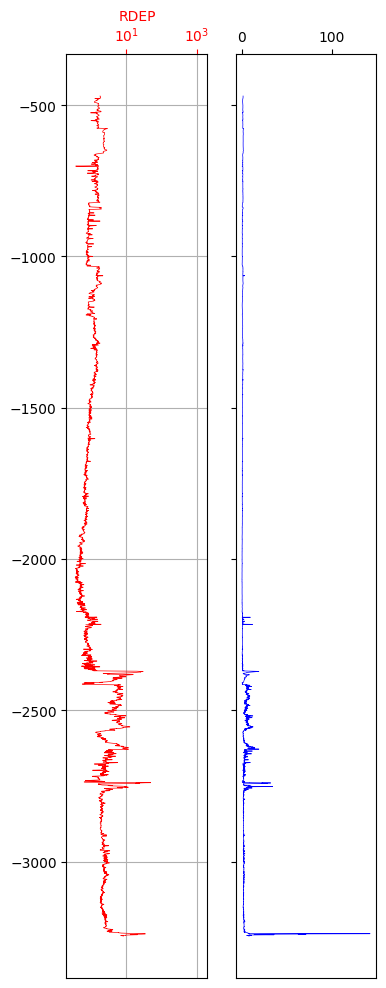

In [23]:
# we'll create a figure with two (2) columns, on for one resistivity and the other for the other
#We'll repeat the previous step but in th's case we'll include indexing to locate the track we want
# We also want them to have thesame y axis so we'll share y

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(4,12), sharey=True)

ax[0].plot("RDEP", "Z_LOC", data= well_data, color='red', linewidth=0.5)

ax[0].set_xscale("log")
ax[0].set_xlim(0.2, 2000)
ax[0].tick_params(axis='x', colors='red')
ax[0].grid()
ax[0].set_xlabel('RDEP')
ax[0].xaxis.set_label_position('top') 
ax[0].xaxis.tick_top()
ax[0].xaxis.label.set_color("red")


#Plot the second Resistivity
ax[1].plot("RMED", "Z_LOC", data= well_data, color='blue', linewidth=0.5)



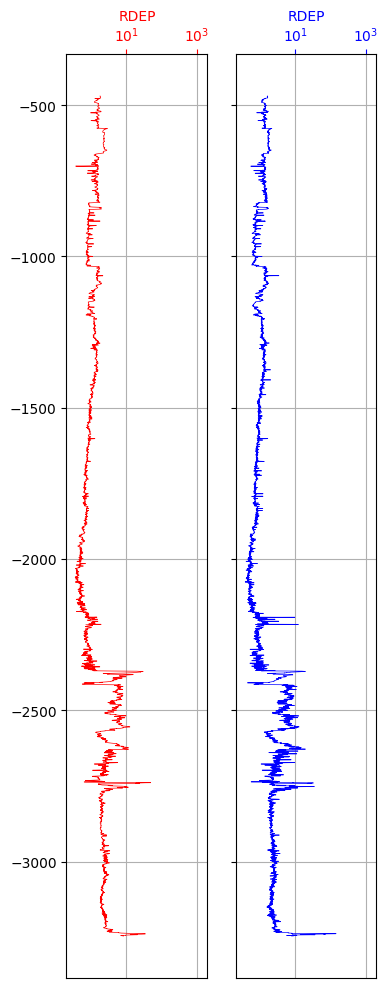

In [25]:
# DO NOT Repeat yourself. Optimize your codes, so instead of repeating thesame code for the second track we can use a for loop to customise

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(4,12), sharey=True)

ax[0].plot("RDEP", "Z_LOC", data= well_data, color='red', linewidth=0.5)

ax[1].plot("RMED", "Z_LOC", data= well_data, color='blue', linewidth=0.5)


for x in [0, 1]:
    ax[x].set_xscale("log")
    ax[x].set_xlim(0.2, 2000)
    ax[x].tick_params(axis='x', colors='red')
    ax[x].grid()
    ax[x].set_xlabel('RDEP')
    ax[x].xaxis.set_label_position('top') 
    ax[x].xaxis.tick_top()

ax[0].xaxis.label.set_color("red")
ax[1].xaxis.label.set_color("blue")
ax[1].tick_params(axis='x', colors='blue')



We can now see how the two resistivity plot and can now identify some difference in the plot (~ -2200m).

This is a great way to visualise but they need to be on thesesame track.

Let's figure how to go about this

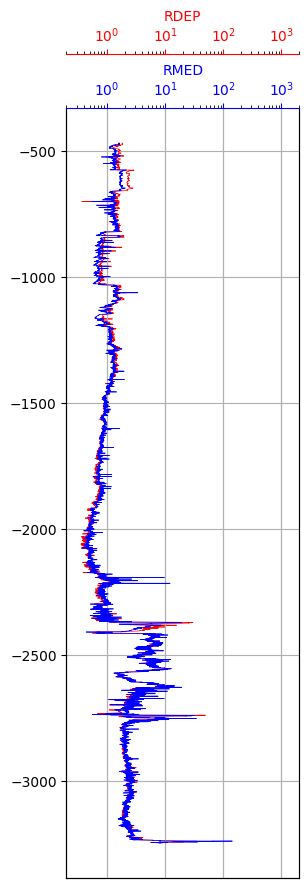

In [27]:
# to do this we need to create just one subplot/axes and duplicate the axes using twiny 


fig, ax = plt.subplots(figsize=(3,10), sharey=True)
ax1=ax.twiny()

# Now we can go ahead to plot using the previous steps

ax.plot("RDEP", "Z_LOC", data= well_data, color='red', linewidth=0.5)
ax.tick_params(axis='x', colors='red')
ax.set_xlabel('RDEP')
ax.spines["top"].set_edgecolor("red")
ax.xaxis.label.set_color("red")
ax.spines["top"].set_position(("axes", 1.07)) #This moves the scale for 'RDEP upward

#2nd Plot
ax1.plot("RMED", "Z_LOC", data= well_data, color='blue', linewidth=0.5)
ax1.tick_params(axis='x', colors='blue')
ax1.set_xlabel('RMED')
ax1.xaxis.label.set_color("blue")
ax1.spines["top"].set_edgecolor("blue")

# Use for loop for process that applies to both plots
for x in [ax, ax1]: 
    x.set_xscale("log")
    x.set_xlim(0.2, 2000)
    x.grid()
    x.xaxis.set_label_position('top') 
    x.xaxis.tick_top()


Looks good you can use different scale for the 2 plots

We can make RDEP log scale and RMED normal

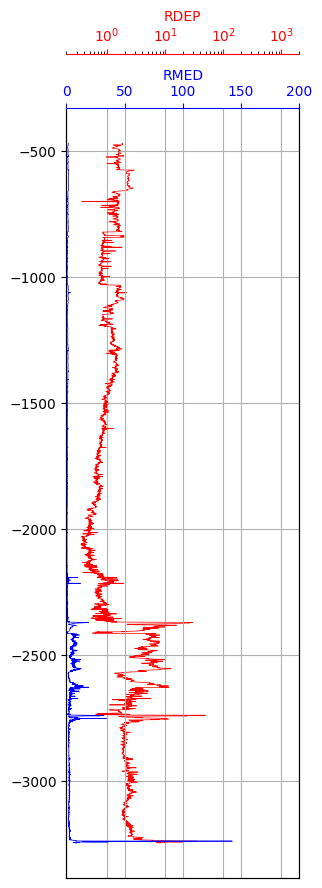

In [29]:


fig, ax = plt.subplots(figsize=(3,10), sharey=True)
ax1=ax.twiny()

# Now we can go ahead to plot using the previous steps

ax.plot("RDEP", "Z_LOC", data= well_data, color='red', linewidth=0.5)
ax.set_xscale("log")
ax.set_xlim(0.2, 2000)
ax.tick_params(axis='x', colors='red')
ax.set_xlabel('RDEP')
ax.spines["top"].set_edgecolor("red")
ax.xaxis.label.set_color("red")
ax.spines["top"].set_position(("axes", 1.07)) #This moves the scale for 'RDEP upward

#2nd Plot
ax1.plot("RMED", "Z_LOC", data= well_data, color='blue', linewidth=0.5)
ax1.set_xlim(0, 200)
ax1.tick_params(axis='x', colors='blue')
ax1.set_xlabel('RMED')
ax1.xaxis.label.set_color("blue")
ax1.spines["top"].set_edgecolor("blue")

# Use for loop for process that applies to both plots
for x in [ax, ax1]: 
    
    x.grid()
    x.xaxis.set_label_position('top') 
    x.xaxis.tick_top()


# Density

Now let's move to the next track, we'll repeat the previous steps but with the density and neutron logs

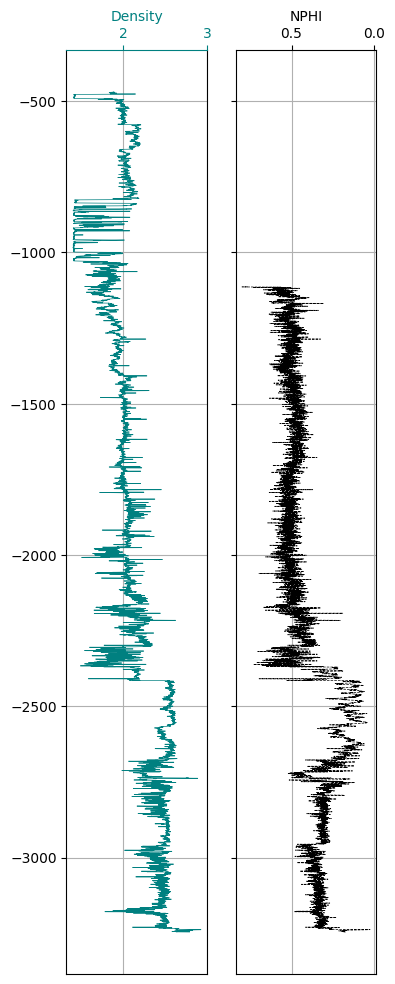

In [30]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(4,12), sharey=True)


# First Plot RHOB
ax[0].plot("RHOB", "Z_LOC", data= well_data, color='teal', linewidth=0.5)
ax[0].set_xlabel("Density") # xlabel
# ax[0].set_xlim(1.95, 2.95) # change as appropriate 
ax[0].tick_params(axis='x', colors='teal') # x tick color
ax[0].xaxis.label.set_color("teal") # x label color
ax[0].xaxis.set_label_position('top') #position of label
ax[0].spines["top"].set_edgecolor("teal") #top horizontal bar color
ax[0].xaxis.tick_top()
ax[0].grid()


# second Plot NPHI
ax[1].plot("NPHI", "Z_LOC", data= well_data, color='black', linewidth=0.5, linestyle='dashed')
ax[1].set_xlabel("NPHI") # xlabel
# ax[0].set_xlim(0, 0.6)
ax[1].tick_params(axis='x', colors='black') # x tick color
ax[1].xaxis.label.set_color("black") # x label color
ax[1].xaxis.set_label_position('top') #position of label
ax[1].spines["top"].set_edgecolor("black") #top horizontal bar color
ax[1].invert_xaxis() #invert NPHI (neutron logs is usually intepreted inverted)
ax[1].xaxis.tick_top()
ax[1].grid()


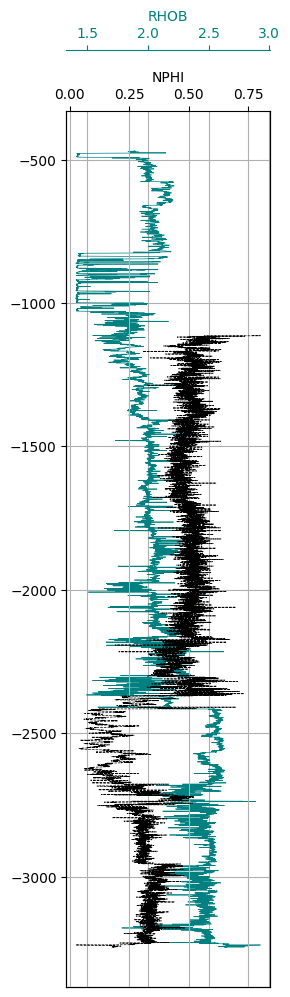

In [31]:
# we can plot them on thesame track

fig, ax = plt.subplots(figsize=(3,10), sharey=True)

ax1=ax.twiny()
ax.plot("RHOB", "Z_LOC", data= well_data, color='teal', linewidth=0.5)
ax.spines["top"].set_position(("axes", 1.07)) #start with 1.02
# ax.set_xlim(0.2, 2000)
ax.tick_params(axis='x', colors='teal')
ax.set_xlabel('RHOB')
ax.xaxis.set_label_position('top') 
ax.spines["top"].set_edgecolor("teal")
ax.xaxis.label.set_color("teal")


ax1.plot("NPHI", "Z_LOC", data= well_data, color='black', linewidth=0.5, linestyle='dashed')
ax1.tick_params(axis='x', colors='black')
ax1.set_xlabel('NPHI')
ax1.xaxis.label.set_color("black")
ax1.spines["top"].set_edgecolor("black")
# ax1.invert_xaxis()

for x in [ax, ax1]: 
    x.grid()
    x.xaxis.set_label_position('top') 
    x.xaxis.tick_top()

plt.tight_layout()

# Bring it all together
Plot all Logs in one Figure

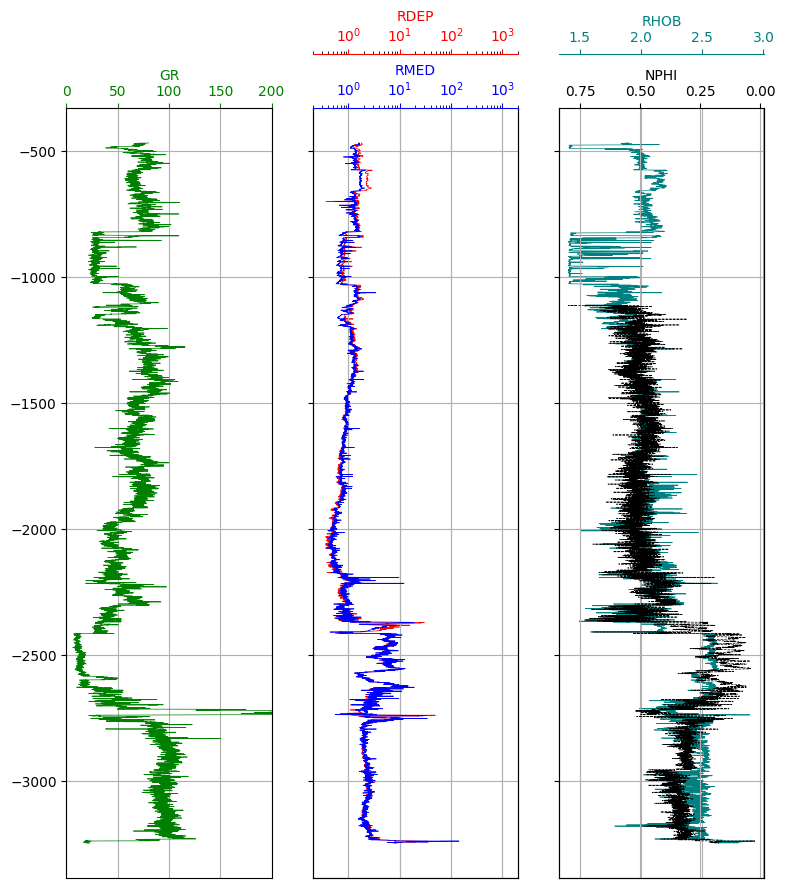

In [33]:
# We'll create a figure with 3 subplot/tracks

fig, (ax0, ax1, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(9,10), sharey=True)

#create twiny subplot for resitivity & density
ax2=ax1.twiny()
ax4=ax3.twiny()

# first track Gamma
ax0.plot('GR', 'Z_LOC', data=well_data, color='green', linewidth=0.5)
ax0.set_xlim(0, 200)
ax0.tick_params(axis='x', colors='green')
ax0.set_xlabel('GR')
ax0.xaxis.label.set_color("green")


# 2nd Track Restivity
ax1.plot("RDEP", "Z_LOC", data= well_data, color='red', linewidth=0.5)
ax1.spines["top"].set_position(("axes", 1.07)) 
ax1.tick_params(axis='x', colors='red')
ax1.set_xlabel('RDEP')
ax1.spines["top"].set_edgecolor("red")
ax1.xaxis.label.set_color("red")


ax2.plot("RMED", "Z_LOC", data= well_data, color='blue', linewidth=0.5)
ax2.tick_params(axis='x', colors='blue')
ax2.set_xlabel('RMED')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_edgecolor("blue")

for x in [ax1, ax2]:
    x.set_xscale("log")
    x.set_xlim(0.2, 2000)
    
    
# 3rd track Neutron density
ax3.plot("RHOB", "Z_LOC", data= well_data, color='teal', linewidth=0.5)
ax3.spines["top"].set_position(("axes", 1.07)) #start with 1.02
# ax.set_xlim(0.2, 2000)
ax3.tick_params(axis='x', colors='teal')
ax3.set_xlabel('RHOB')
ax3.xaxis.set_label_position('top') 
ax3.spines["top"].set_edgecolor("teal")
ax3.xaxis.label.set_color("teal")


ax4.plot("NPHI", "Z_LOC", data= well_data, color='black', linewidth=0.5, linestyle='dashed')
ax4.tick_params(axis='x', colors='black')
ax4.set_xlabel('NPHI')
ax4.xaxis.label.set_color("black")
ax4.spines["top"].set_edgecolor("black")
ax4.invert_xaxis()


for x in [ax0, ax1,  ax2, ax3, ax4]:
    x.grid()
    x.xaxis.set_label_position('top') 
    x.xaxis.tick_top()


We have our plot looking all good, but we can't always have to write these long lines of code whenever we need to plot.

This can be optimize by creating a function. We just have to wrap the code in a function

In [35]:
def plot_5_curve (well_data):
    """
    Plots Well logs in different tracks
    arg (DataFrame): well_data 

      
        """
    

    well_name= ','.join(well_data['WELL'].unique())
    fig, (ax0, ax1, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(9,10), sharey=True)
    
    ax2=ax1.twiny()
    ax4=ax3.twiny()
    
    # first track Gamma
    ax0.plot('GR', 'Z_LOC', data=well_data, color='green', linewidth=0.5)
    ax0.set_xlim(0, 200)
    ax0.tick_params(axis='x', colors='green')
    ax0.set_xlabel('GR')
    
    # 2nd Track Restivity
    ax1.plot("RDEP", "Z_LOC", data= well_data, color='red', linewidth=0.5)
    ax1.spines["top"].set_position(("axes", 1.07)) 
    ax1.tick_params(axis='x', colors='red')
    ax1.set_xlabel('RDEP')
    ax1.spines["top"].set_edgecolor("red")
    ax1.xaxis.label.set_color("red")
    
    
    ax2.plot("RMED", "Z_LOC", data= well_data, color='blue', linewidth=0.5)
    ax2.tick_params(axis='x', colors='blue')
    ax2.set_xlabel('RMED')
    ax2.xaxis.label.set_color("blue")
    ax2.spines["top"].set_edgecolor("blue")
    
    for x in [ax1, ax2]:
        x.set_xscale("log")
        x.set_xlim(0.2, 2000)
        
        
    # 3rd track Neutron density
    ax3.plot("RHOB", "Z_LOC", data= well_data, color='teal', linewidth=0.5)
    ax3.spines["top"].set_position(("axes", 1.06)) #start with 1.02
    # ax.set_xlim(0.2, 2000)
    ax3.tick_params(axis='x', colors='teal')
    ax3.set_xlabel('RHOB')
    ax3.xaxis.set_label_position('top') 
    ax3.spines["top"].set_edgecolor("teal")
    ax3.xaxis.label.set_color("teal")
    
    
    ax4.plot("NPHI", "Z_LOC", data= well_data, color='black', linewidth=0.5, linestyle='dashed')
    ax4.tick_params(axis='x', colors='black')
    ax4.set_xlabel('NPHI')
    ax4.xaxis.label.set_color("black")
    ax4.spines["top"].set_edgecolor("black")
    ax4.invert_xaxis()

    
    fig.suptitle(well_name, fontsize=16)
    
    for x in [ax0, ax1,  ax2, ax3, ax4]:
        x.grid()
        x.xaxis.set_label_position('top') 
        x.xaxis.tick_top()
        

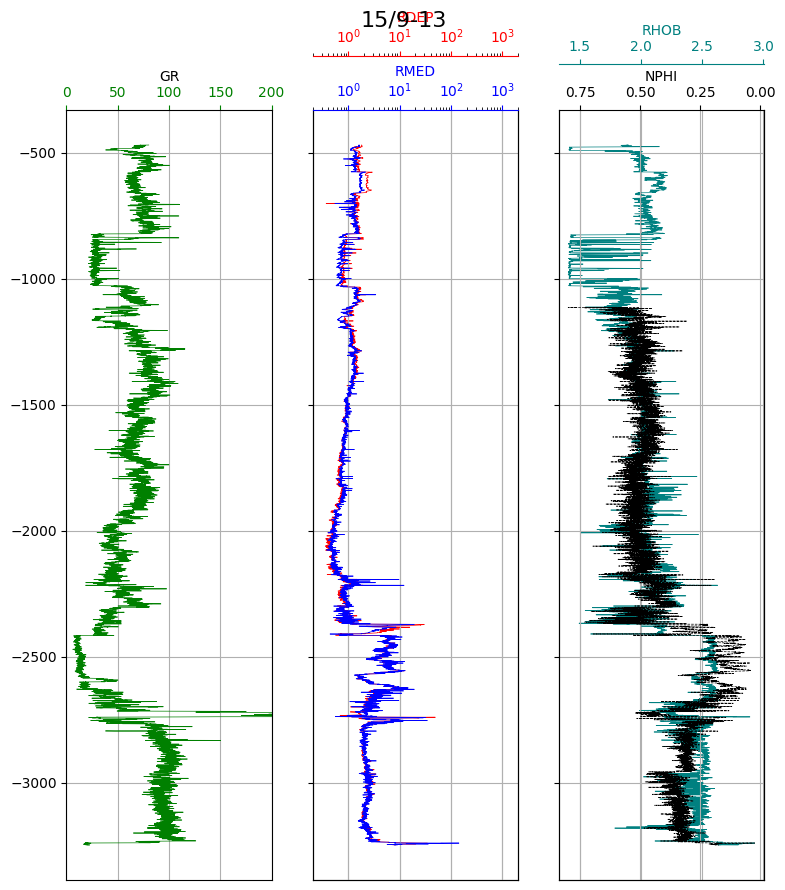

In [36]:
plot_5_curve(well_data)

We can adjust the depth range we need to visualize using the ylim function

In [50]:
def plot_5_curve (well_data, ylim=False):
    """
        Plots Well logs in different tracks
        arg (DataFrame): well_data 
        ylim (bool): False (Default), no limit will be used
      
    """
    well_name= ','.join(well_data['WELL'].unique())
    fig, (ax0, ax1, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(9,10), sharey=True)
    
    ax2=ax1.twiny()
    ax4=ax3.twiny()
    
    # first track Gamma
    ax0.plot('GR', 'Z_LOC', data=well_data, color='green', linewidth=0.5)
    ax0.set_xlim(0, 200)
    ax0.tick_params(axis='x', colors='green')
    ax0.set_xlabel('GR', color='green')
 
    
    # 2nd Track Restivity
    ax1.plot("RDEP", "Z_LOC", data= well_data, color='red', linewidth=0.5)
    ax1.spines["top"].set_position(("axes", 1.07)) 
    ax1.tick_params(axis='x', colors='red')
    ax1.set_xlabel('RDEP', color='red')
    ax1.spines["top"].set_edgecolor("red", )

    
    ax2.plot("RMED", "Z_LOC", data= well_data, color='blue', linewidth=0.5)
    ax2.tick_params(axis='x', colors='blue')
    ax2.set_xlabel('RMED', color='blue')
    ax2.spines["top"].set_edgecolor("blue")
    
    for x in [ax1, ax2]:
        x.set_xscale("log")
        x.set_xlim(0.2, 2000)
        
        
    # 3rd track Neutron density
    ax3.plot("RHOB", "Z_LOC", data= well_data, color='teal', linewidth=0.5)
    ax3.spines["top"].set_position(("axes", 1.06)) #start with 1.02
    ax3.tick_params(axis='x', colors='teal')
    ax3.set_xlabel('RHOB', color='teal') 
    ax3.spines["top"].set_edgecolor("teal")
    
    
    ax4.plot("NPHI", "Z_LOC", data= well_data, color='black', linewidth=0.5, linestyle='dashed')
    ax4.tick_params(axis='x', colors='black')
    ax4.set_xlabel('NPHI', color='black')
    ax4.spines["top"].set_edgecolor("black")
    ax4.invert_xaxis()

    
    fig.suptitle(well_name, fontsize=16, fontweight='bold', ha='right')
    
    for x in [ax0, ax1,  ax2, ax3, ax4]:
        x.grid()
        x.xaxis.set_label_position('top') 
        x.xaxis.tick_top()

        # add a condition if ylim is given then the limit is applied
        if ylim:
            x.set_ylim( ylim)
        

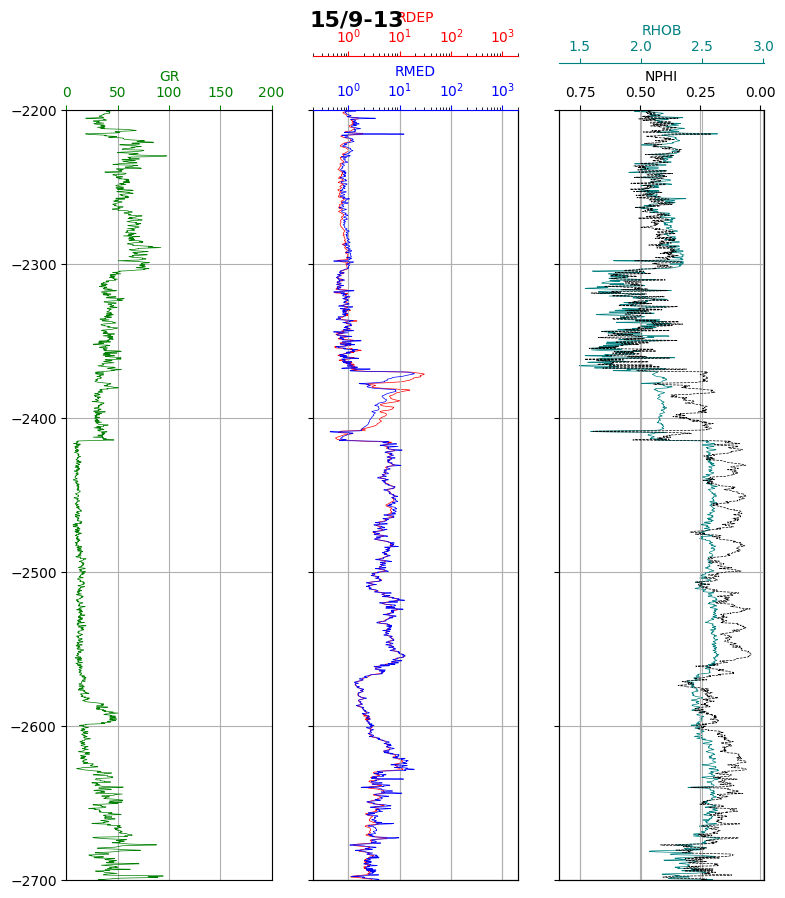

In [51]:
plot_5_curve(well_data, ylim=[-2700, -2200])

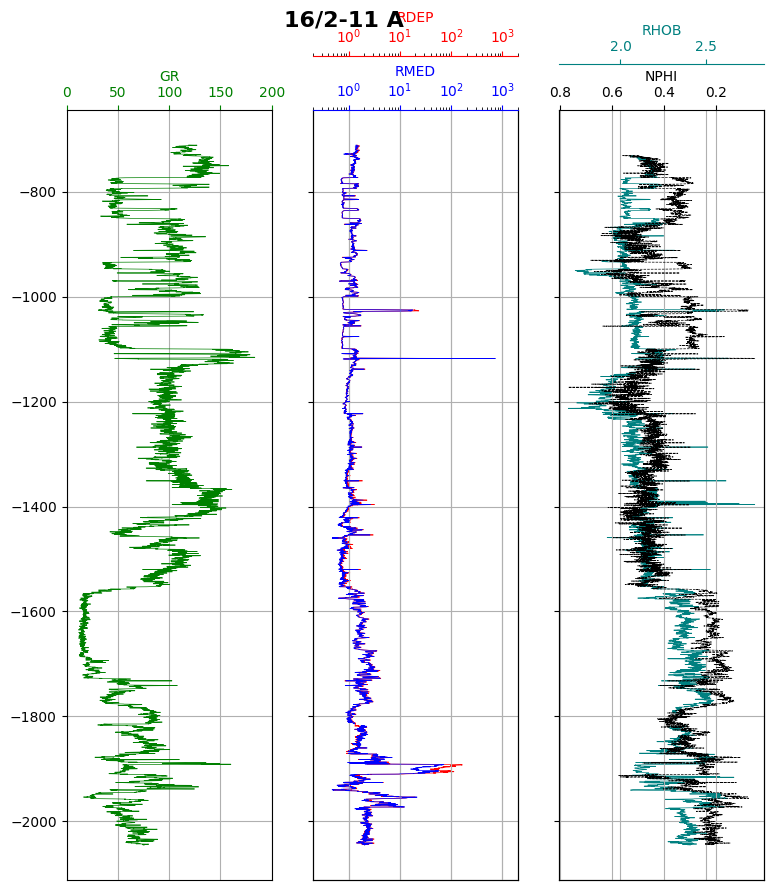

In [52]:
# visualise a different well
plot_5_curve(data[data['WELL']==wells[10]])